### Importar las librerías a utilizar

In [2]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Leer archivo de datos

In [3]:
datos = pd.read_csv("titanic3.csv")

In [4]:
datos.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
datos.describe()

In [ ]:
datos.info()

In [ ]:
datos.shape

## Ejemplos de uso de Seaborn para explorar los datos

In [ ]:
sns.displot(datos['pclass'])

In [ ]:
sns.countplot(x = 'sex', data = datos);

### Pura Magia

In [ ]:
profile = ProfileReport(datos)
profile

Toda la información que nos da este reporte, la podemos obtener directamente con instrucciones de Pandas...obviamente, es mucho más simple dar una sola instrucción.

### Conocemos los datos y ahora qué hacer para prepararlos (limpiarlos)?

Pandas tiene todas las instrucciones para:
1.  estandarizar los nombres de las variables
2.  eliminar datos faltantes
3.  eliminar registros duplicados
4.  crear nuevas variables
5.  etc.


###  Eliminar columnas

La columna "body" normalmente no nos será útil, eliminémosla

In [5]:
datos = datos.drop(labels="body", axis=1)

#### **Respuesta a Inciso**

Utilizando la función drop se elimina la columna `body`.

### Cambiar el tipo de algunos datos

Varias de las columnas son categóricas, habrá que codificarlas

In [6]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [72]:
dataTransf = pd.DataFrame()  # DataFrame final
nominalTransfCol = OneHotEncoder(sparse_output=False)  
vNominal = ["sex","ticket","cabin","embarked","boat","home.dest"]
# vNominal = ["sex"]
categorias = {}  # Diccionario para almacenar las categorías en orden

# Transformar variables categóricas y añadirlas al DataFrame
for var in vNominal:
    # Obtener el df y sus valores
    dc_parser = datos[var].values.reshape(-1, 1)

    # Transformar los datos
    dc_parser_transformed = nominalTransfCol.fit_transform(dc_parser)
    
    # Obtener los nombres de las categorías y almacenarlas en el diccionario
    categorias[var] = nominalTransfCol.categories_[0].tolist()

    # Obtener los nombres de columnas generadas
    dc_temp_column_name = [var + "_" + str(j) for j in range(dc_parser_transformed.shape[1])]

    # Convertir a DataFrame y concatenar
    dc_temp = pd.DataFrame(dc_parser_transformed, columns=dc_temp_column_name)
    dataTransf = pd.concat([dataTransf, dc_temp], axis=1)

#### **Respuesta a Inciso: `Cambiar el Tipo de Algunos Datos`**

**Explicación código:**
  1. Al obtener el df y sus valores se transforma la columna con sus observaciones a un objeto `array de numpy` en `2 dimensiones` porque OneHotEncoder trabaja con este tipo de objetos.
    1.1 `reshape(-1,1)`: el -1 indica que haga la cantidad de observaciones necesarias y 1 indica que deben estar en una columna.
  2. Se transforman los datos usando fit_transform
  3. Se obtienen las diferentes categorías de la columna que se transformó mediante `categories_[0]` porque una vez hecho fit esas distintas categorías se almacenan en un array y dado que se hace por columna solo hay una columna en `categories_` y se guarda en el diccionario de categorias.
  4. Se hace un listado con el nombre de columnas con la sintaxis **columna_iteracion**.
  5. Se hace un df con los datos transformados y colocandole nombre a las columnas con el listado anterior y concatenandolo al df final.

En este punto se tiene los dataframes:

- data: este es el dataframe original (quitando la columna body que no será utilizada).
- dataTransf: este es el dataframe con las variables nominales transformadas a numéricas.
  - En el caso de variables nominales se realiza una conversión siguiendo OneHotEncoding de SkLearn para variables nominales como sex, ticket, cabin, embarked, boat, home.dest.

### Estandarizar los nombres de las columnas:

In [176]:
numCol = 0
new_columns = dataTransf.columns.to_list() # Obtener el listado de nombre de columnas en un listado

# Obtener nuevos nombres de columnas
for col in vNominal:
    cat = categorias[col]
    for nCat in range(len(cat)):
        if pd.isna(cat[nCat]):
            continue  # Si la categoría es NaN, omitirla
        new_columns[numCol] = f"{col}_{cat[nCat]}"
        numCol += 1

dataTransf.columns = new_columns # Estandarizar el nombre de las columnas

#### **Respuesta a Inciso: `Estandarizar los nombres de las columnas`**

Dado que por parte de OneHotEncoder tenemos las diferentes categorías y el algoritmo divide en varias columnas para colocar un 1 si pertenece a dicha categoría y 0 si no.

> Nota: esto lo hace en orden alfabetico si no se dice lo contrario.

Por lo tanto se puede colocar el nombre asociado a la categoría a cada columna por ejemplo **sex_female y sex_male** sabiendo que el orden de las categorias de las columnas obtenido por OneHotEncoder estan en el mismo orden que las columnas los datos mantendran orden.

In [102]:
dataTransf

,sex_female,sex_male,ticket_110152,ticket_110413,ticket_110465,ticket_110469,ticket_110489,ticket_110564,ticket_110813,ticket_111163,...,"home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland",home.dest_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Eliminar filas duplicadas

In [177]:
datos_num = datos[["pclass", "survived", "name", "age", "sibsp", "parch", "fare"]]
titanic = pd.concat([datos_num, dataTransf], axis=1)

duplicados = titanic.duplicated().sum()

if duplicados > 0:
  duplicados = duplicados.drop_duplicates()
  print(f"Se eliminaron {duplicados} observaciones.")
else:
  print("No hay observaciones duplicadas.")

No hay observaciones duplicadas.


#### **Respuesta Inciso: `Eliminar filas duplicadas`**

Uniendo los DataFrame en uno solo contando los `numéricos` de datos y los "`categoricos`" de dataTransf se cuenta las observaciones duplicadas, en caso que hubieran *(no es el caso)* se eliminan.


### Reemplazar valores faltantes

### Eliminar filas con valores faltantes

In [178]:
res_nan = titanic.isnull().sum()

if res_nan.sum() > 0:
    print(f"Existen {res_nan.sum()} observaciones NaN")
    titanic.dropna(inplace=True)
else:
    print("No existen valores NaN")


Existen 264 observaciones NaN


In [179]:
titanic.isnull().sum()

pclass                                           0
survived                                         0
name                                             0
age                                              0
sibsp                                            0
                                                ..
home.dest_Zurich, Switzerland                    0
home.dest_Yoevil, England / Cottage Grove, OR    0
home.dest_Youngstown, OH                         0
home.dest_Zurich, Switzerland                    0
home.dest_nan                                    0
Length: 1527, dtype: int64

#### **Respuesta Inciso: `Eliminar  con valores faltantes`**

Si existen valores nan se eliminan detectacdolos con `isnull().sum().sum()` en tal caso caso se eliminarán las observaciones asociadas a los valores nan.

### Explorar los datos numéricos

Realizar Boxplots para cada uno

In [180]:
ageDF = titanic["age"]
fareDF = titanic["fare"]
sibspDF = titanic["sibsp"]
parchDF = titanic["parch"]

##### **BoxPlot: Age**

Los datos reflejan que existe una variabilidad de los años de los pasajeros entre 20 y 40 años con una media entre 28 - 30 años indicando que el 50% de las personas tenían una edad menor a esa indicando que los datos se inclinan levemente (y podría considerarse casi una distribución simétrica) a tener más personas jóvenes. con una distribución asimétrica debido a esto. Si embargo, existen datos atípicos después de ~68 años.

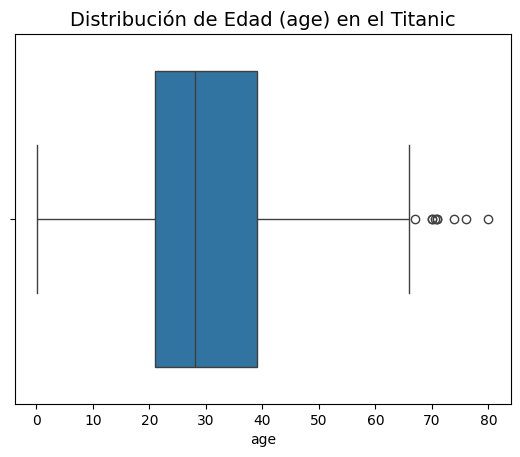

In [83]:
sns.boxplot(data=ageDF, orient="h")
plt.title("Distribución de Edad (age) en el Titanic", fontsize=14)
plt.show()

##### **BoxPlot: Fare**

Los datos reflejan que existe una concentración de las tarifas de los tickets entre 0 y 50 libras, con un máximo cercano a 100 libras y datos atípicos en el rango de 100 a 300 libras, además de uno de 500 libras. Esto puede indicar una distribución de personas según la clase social: los datos atípicos probablemente representan a los pasajeros de primera clase, mientras que los valores concentrados corresponden a quienes viajaban en segunda y tercera clase. Sin embargo, se observa que la mediana está aproximadamente en 10 libras, lo que significa que el 50% de los valores de tarifa son menores o iguales a este valor, y a partir de ahí el precio aumenta considerablemente.

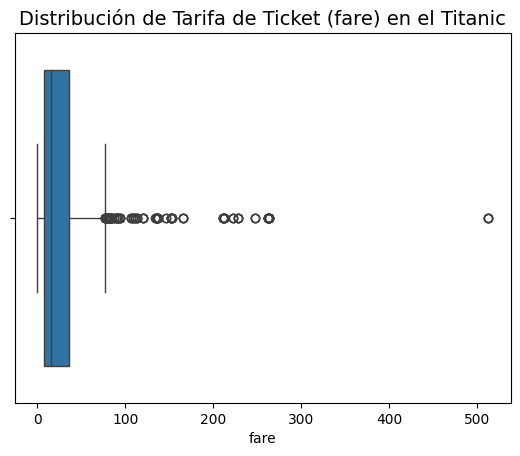

In [84]:
sns.boxplot(data=fareDF, orient="h")
plt.title("Distribución de Tarifa de Ticket (fare) en el Titanic", fontsize=14)
plt.show()

##### **BoxPlot: Sibs**

Los datos reflejan que la mayoría de las personas a bordo no iban acompañadas de este tipo de familiares, lo cual puede considerarse normal, especialmente en el caso de "esposo/a". En cuanto a hermanos, parece común que solo viajara una persona o, en algunos casos, ninguna, con un máximo de dos. Sin embargo, se identifican casos atípicos donde el número de estos familiares varía entre tres y ocho.

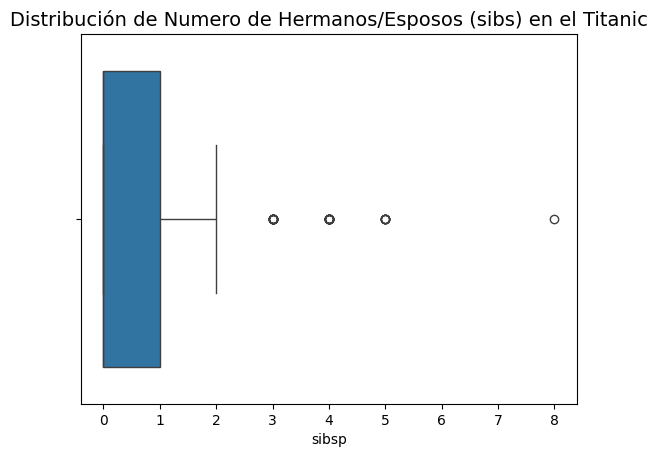

In [85]:
sns.boxplot(data=sibspDF, orient="h")
plt.title("Distribución de Numero de Hermanos/Esposos (sibs) en el Titanic", fontsize=14)
plt.show()

##### **BoxPlot: Parch**

Al igual que sibs se puede observar el mismo comportamiento con esta variable indicando los casos especiales de 0 padres en caso de niños que iban con niñeras por ejemplo y un máximo de 2 para cualquiera de los familiares padres/hijos con datos atípicos desde 3 a 8 familiares.

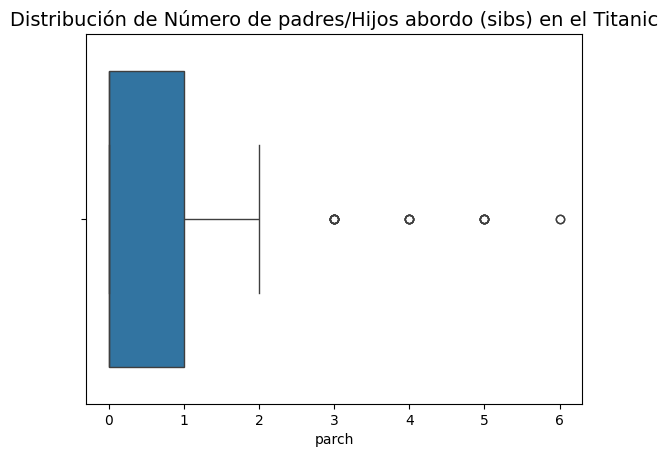

In [100]:
sns.boxplot(data=parchDF, orient="h")
plt.title("Distribución de Número de padres/Hijos abordo (sibs) en el Titanic", fontsize=14)
plt.show()

### Explorar los datos categóricos

Realizar gráficas de barras ej. de survived, sex

##### **BarPlot: Sex**

En los resultados vemos que de la cantidad total de pasajeros más del 50% era hombres y el retos mujeres.

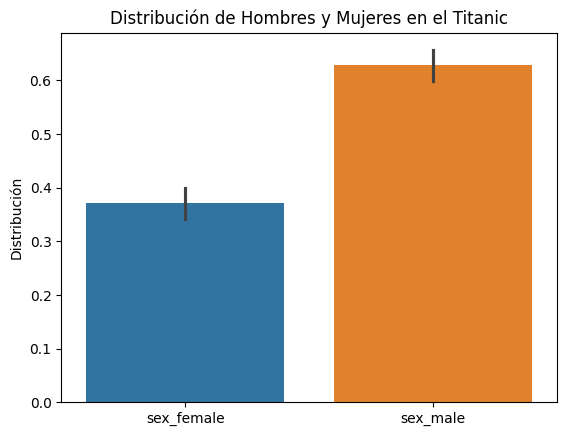

In [181]:
sex_columns = titanic.filter(like="sex_", axis=1)
sns.barplot(sex_columns)
plt.title("Distribución de Hombres y Mujeres en el Titanic")
plt.ylabel("Distribución")
plt.show()

##### **BarPlot: Survived**

En los resultados vemos que de la cantidad total de pasajeros la mayoría no pudo sobrevivir.

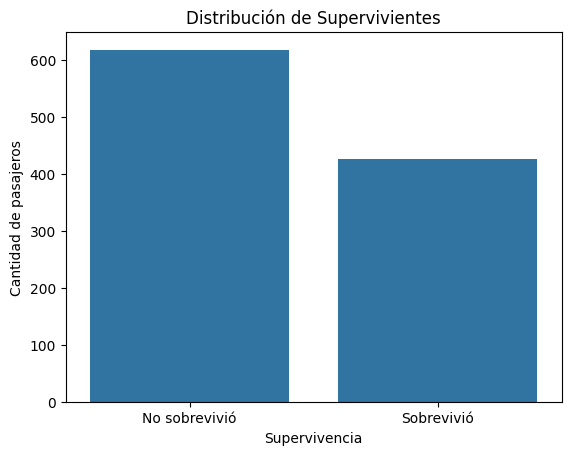

In [182]:
sns.countplot(data=titanic, x="survived")
plt.xlabel("Supervivencia")
plt.ylabel("Cantidad de pasajeros")
plt.title("Distribución de Supervivientes")
plt.xticks([0, 1], ['No sobrevivió', 'Sobrevivió'])
plt.show()

### **BarPlot: Embarked**

En los resultados se puede observar una distribución clara de los puertos desde los cuales embarcó el Titanic, lo que refleja, en cierta medida, el estatus socioeconómico de los pasajeros. Por ejemplo, según el siguiente [artículo](https://acortar.link/SD2rjR), el puerto de **Southampton** era conocido por recibir a personas elegantemente vestidas, lo que indicaba que la mayoría de los pasajeros eran de clases más altas en el momento de embarcar. Por otro lado, **Cherbourg** fue el puerto más grande del mundo en su época, según este [artículo ](https://acortar.link/Mq1t8i), lo que sugiere que un número significativo de pasajeros abordaron el Titanic desde allí.

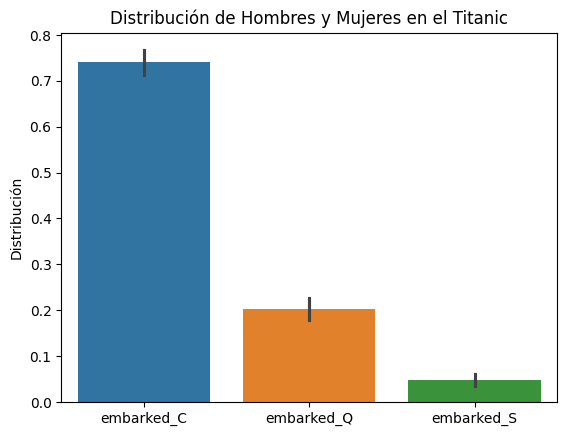

In [183]:
embarked_columns = titanic.filter(like="embarked_", axis=1)
sns.barplot(embarked_columns)
plt.title("Distribución de Puertos de Embarque del Titanic")
plt.ylabel("Distribución")
plt.show()

Contrastar variables categóricas, por ej. survived vs sex con gráfica de barras apiladas (stacked)

##### **BarPlot: Sex vs Survived**

En los datos se observa que la supervivencia se priorizó para las mujeres gran diferencia teniendo relación con los [artículos](https://acortar.link/UQKdGQ) que afirman esta prioridad con el género.

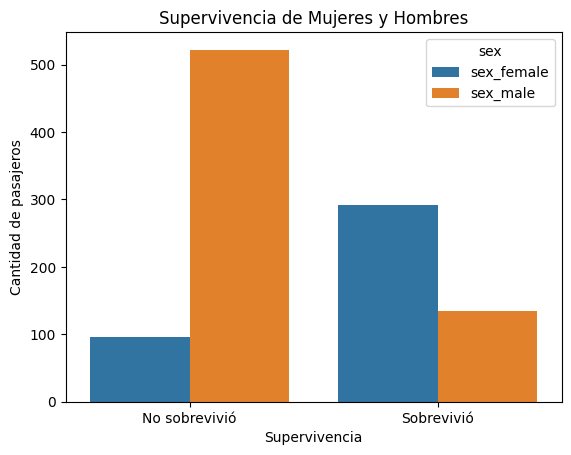

In [186]:
spTitanic = pd.concat([titanic["survived"], sex_columns], axis=1)

# Obtener una única columna para 'sex'
spTitanic_melted = spTitanic.melt(id_vars=["survived"], value_vars=sex_columns.columns, var_name="sex", value_name="value")

# Filtrar solo las filas donde el valor es 1
spTitanic_melted = spTitanic_melted[spTitanic_melted["value"] == 1]

sns.countplot(data=spTitanic_melted, x="survived", hue="sex")
plt.xlabel("Supervivencia")
plt.xticks([0, 1], ['No sobrevivió', 'Sobrevivió'])
plt.ylabel("Cantidad de pasajeros")
plt.title("Supervivencia de Mujeres y Hombres")
plt.show()

##### **BarPlot: Sex vs Pclass**

En los resultados podemos observar que la presencia de hombres siempre es mayor a la de mujeres en todas las clases.

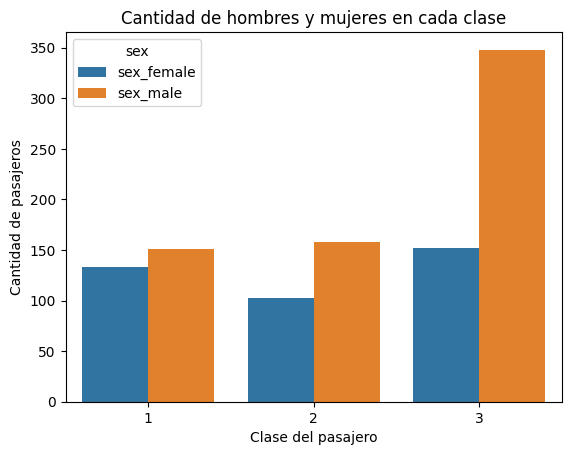

In [187]:
spTitanic = pd.concat([titanic["pclass"], sex_columns], axis=1)

# Obtener una única columna para 'sex'
spTitanic_melted = spTitanic.melt(id_vars=["pclass"], value_vars=sex_columns.columns, var_name="sex", value_name="value")

# Filtrar solo las filas donde el valor es 1
spTitanic_melted = spTitanic_melted[spTitanic_melted["value"] == 1]

sns.countplot(data=spTitanic_melted, x="pclass", hue="sex")
plt.xlabel("Clase del pasajero")
plt.ylabel("Cantidad de pasajeros")
plt.title("Cantidad de hombres y mujeres en cada clase")
plt.show()

### Reducir la cardinalidad

Pueden haber columas con datos categóricos demasiados variados, se podría poner un límite de frecuencia de una categoría y las que no cumplen cambiarles a un valor ötros", o algo así

In [ ]:
variationCat=["ticket", "cabin", "boat", "home.dest"]

print(titanic.filter(like=variationCat[0]+"_", axis=1).shape[1])
print(titanic.filter(like=variationCat[1]+"_", axis=1).shape[1])
print(titanic.filter(like=variationCat[2]+"_", axis=1).shape[1])
print(titanic.filter(like=variationCat[3]+"_", axis=1).shape[1])

929
186
27
373


### Eliminar datos atípicos